In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('Abalone.csv',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# Creating the DataFrame
data=pd.DataFrame(df)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Data Analysis: 

Features/Attributes:
Sex,
Length,
Diameter,
Height,
Whole weight,
Shucked weight,
Viscera weight,
Shell weight.

Targets/Labels:
Age


After reading the Data set information we have to Predict the age of abalone from physical measurements.So,by calculating the no. of rings we can predict the age. The Data in the rings field is continuous thus it is a Linear Regression Problem.

Also as we have to predict the age thus adding 1.5 in the rings we will get the age of the abalone,so I'm making a new age column and dropping the rings column.

In [4]:
#...........Making a new column "Age" and dropping "sex".......... 
data['Age'] = data['Rings']+1.5
data=data.drop(['Rings'],axis=1)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


# EDA ANALYSIS

In [5]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 4177 rows and 9 columns.
data.shape

(4177, 9)

In [6]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5


In [7]:
# Printed the last 10 rows of the dataset
data.tail(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4167,M,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,10.5
4168,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,9.5
4169,M,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,11.5
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,11.5
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,9.5
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [8]:
# .............Statistical Information........
data.describe()
# All the fields are not normally distributed(because mean!= median!=mode)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [9]:
# ..........checking the Feature information regarding the dataset.........
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


##### According to the Infomation:                                     
1)There is no-Null data.                                              
2)Object Type - 1                                     
3)Float Type - 7                             
4)Int Type - 1                              

In [10]:
# ........Checking missing values.......
df.isnull().sum()
# Thus no null values.

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

### Univariate Plots Analysis

In [11]:
# Counting number of different "Sex" values...
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

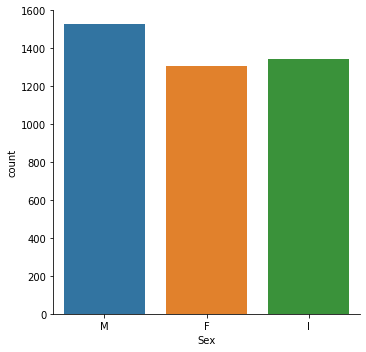

In [12]:
# Plotting number of "Sex" using catplot.
sns.catplot(x='Sex',data=data,kind='count')

In [13]:
# .....Printing the mean values of different fields corresponding to the respective Sex....
a=df.groupby('Sex')[df.drop(['Sex'],axis=1).columns.values].mean()
a

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304,12.629304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497,12.205497


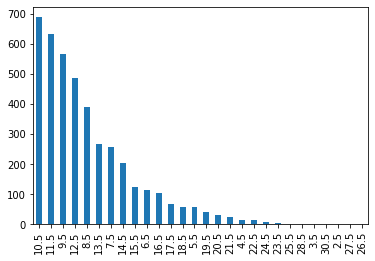

In [14]:
# ......Number of counts of Age......
df['Age'].value_counts().plot(kind="bar");

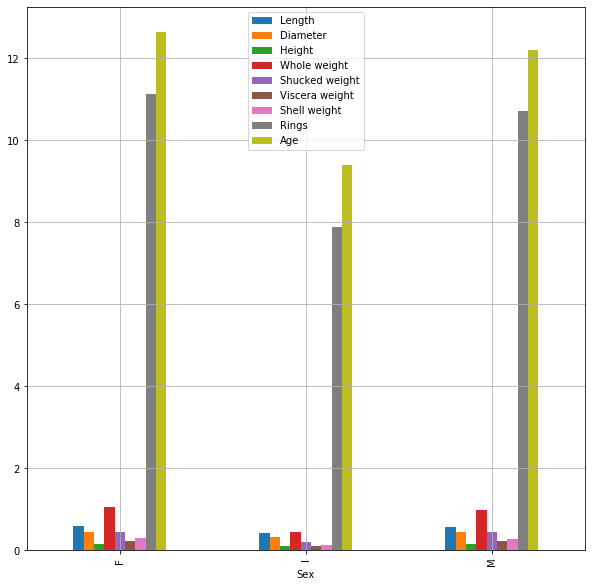

In [15]:
# Plotting the graph of mean values of different fields corresponding to the respective Sex.
a.plot.bar(figsize=(10,10),grid=True,layout=(2,4))

Length               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Height            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Viscera weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Shell weight            AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                  AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

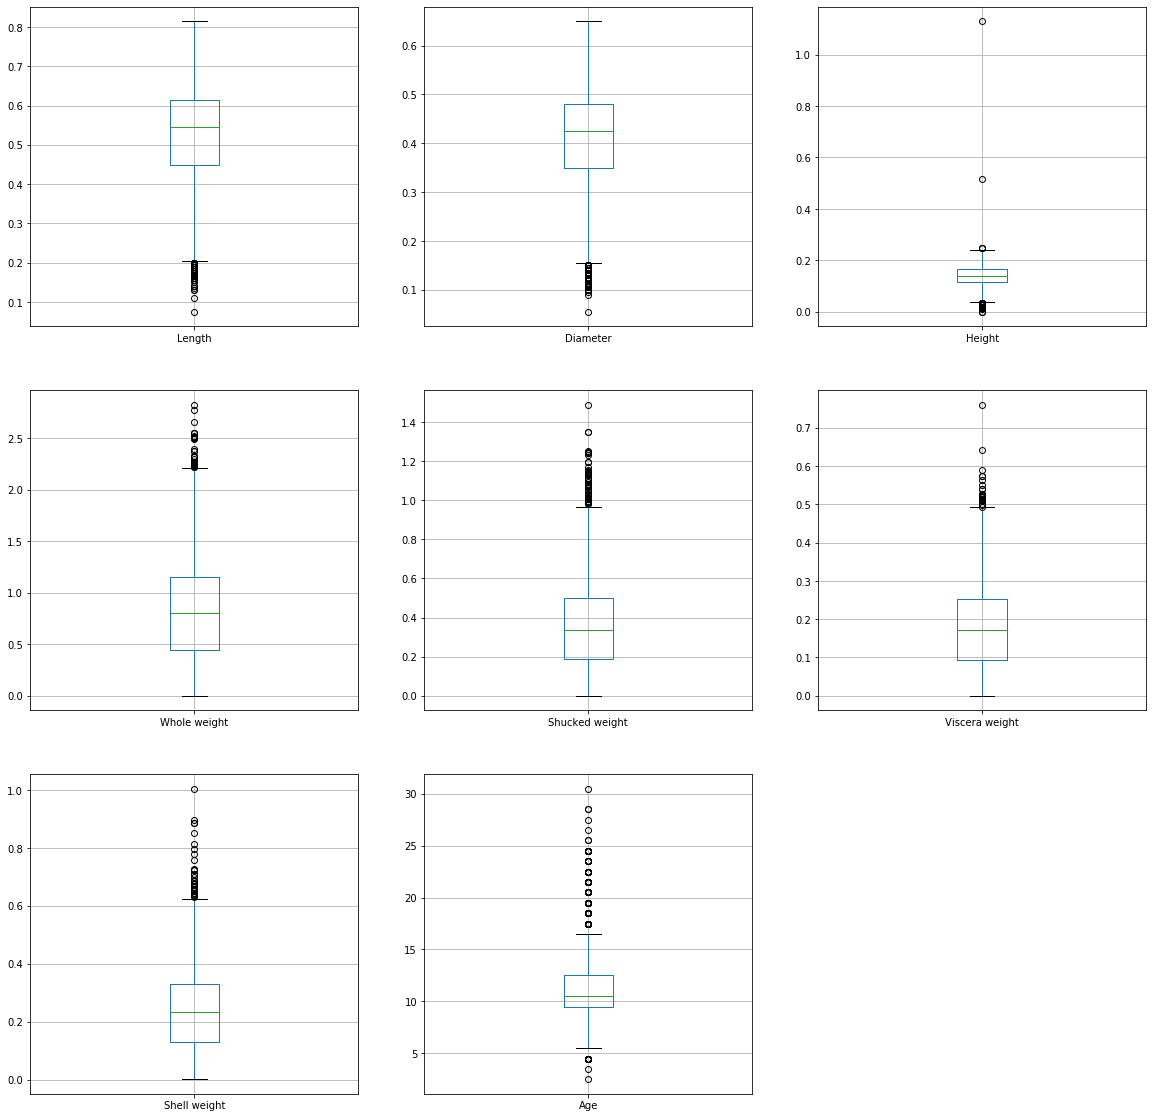

In [16]:
# .........Box Plot........
data.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC416E40C8>,
      dtype=object)

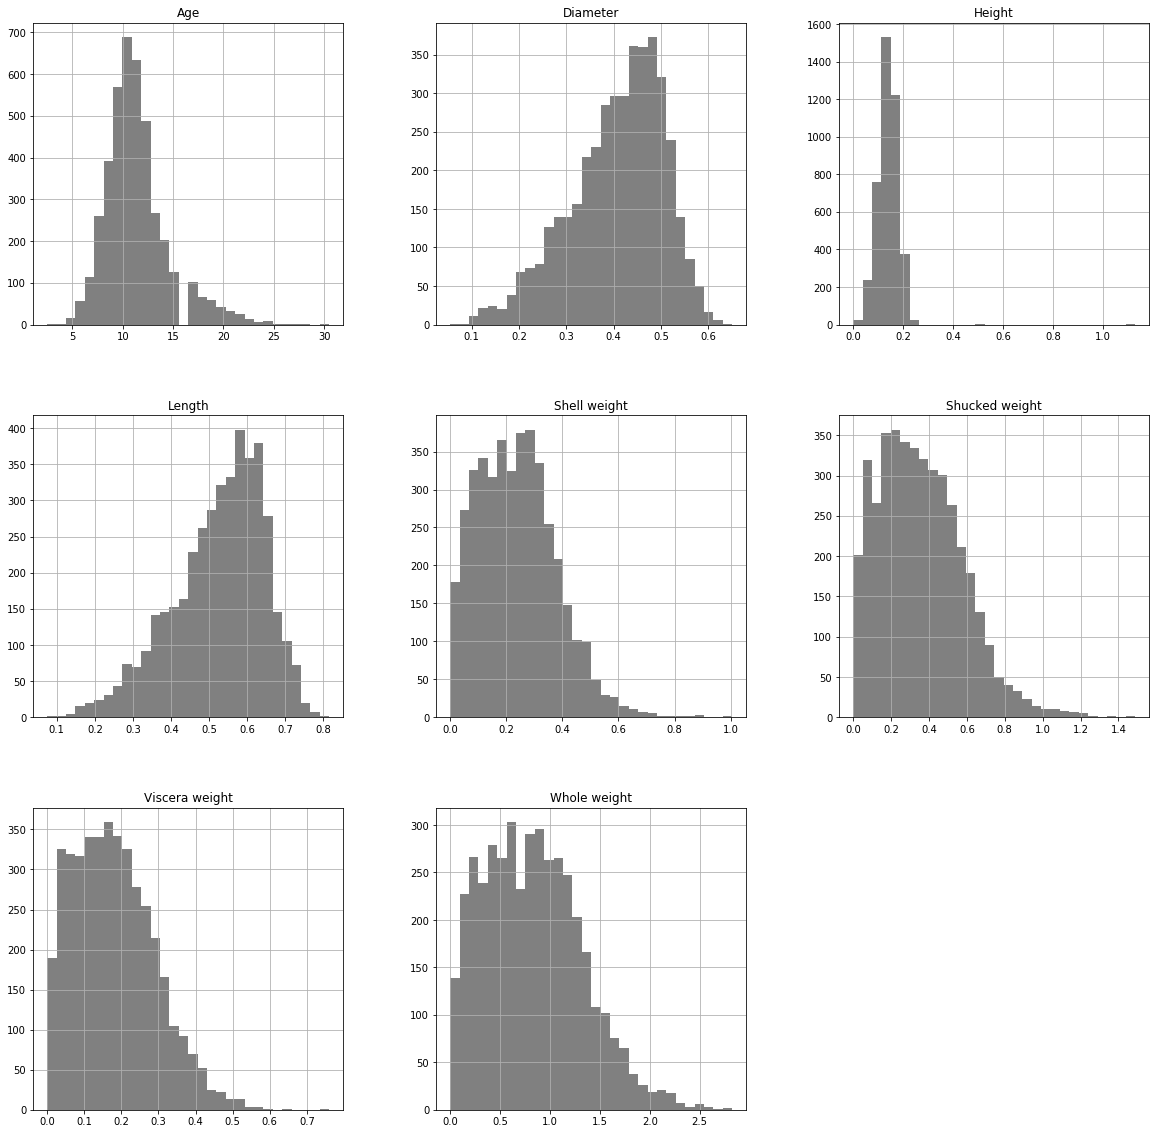

In [17]:
#Checking the Distribution using the histogram plot.
data.hist(figsize=(20,20),grid=True,layout=(3,3),bins=30,color='grey')

In [18]:
# checking the skewness
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

In [19]:
# using Label Encoding to change the value in binary format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data['Sex'])
data['Sex']=le.transform(data['Sex'])
data
# Here Male =2, Female= 0, Infant=1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [20]:
# ....Removing Skewness of the dataset.....
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [21]:
# checking skewness again
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            1.099602
Whole weight      0.530959
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
Age               0.102513
dtype: float64

In [22]:
# .......checking for outliers and removing them..........
from scipy.stats import zscore
z=np.abs(zscore(data))
print(data.shape)
df_new=data.loc[(z<3).all(axis=1)]
print(df_new.shape)

(4177, 9)
(4094, 9)


In [23]:
# .......Checking the skewness after removing outliers....
df_new.skew()

Sex              -0.096054
Length           -0.588509
Diameter         -0.569953
Height           -0.279594
Whole weight      0.400590
Shucked weight    0.224642
Viscera weight    0.315753
Shell weight      0.203980
Age               0.170801
dtype: float64

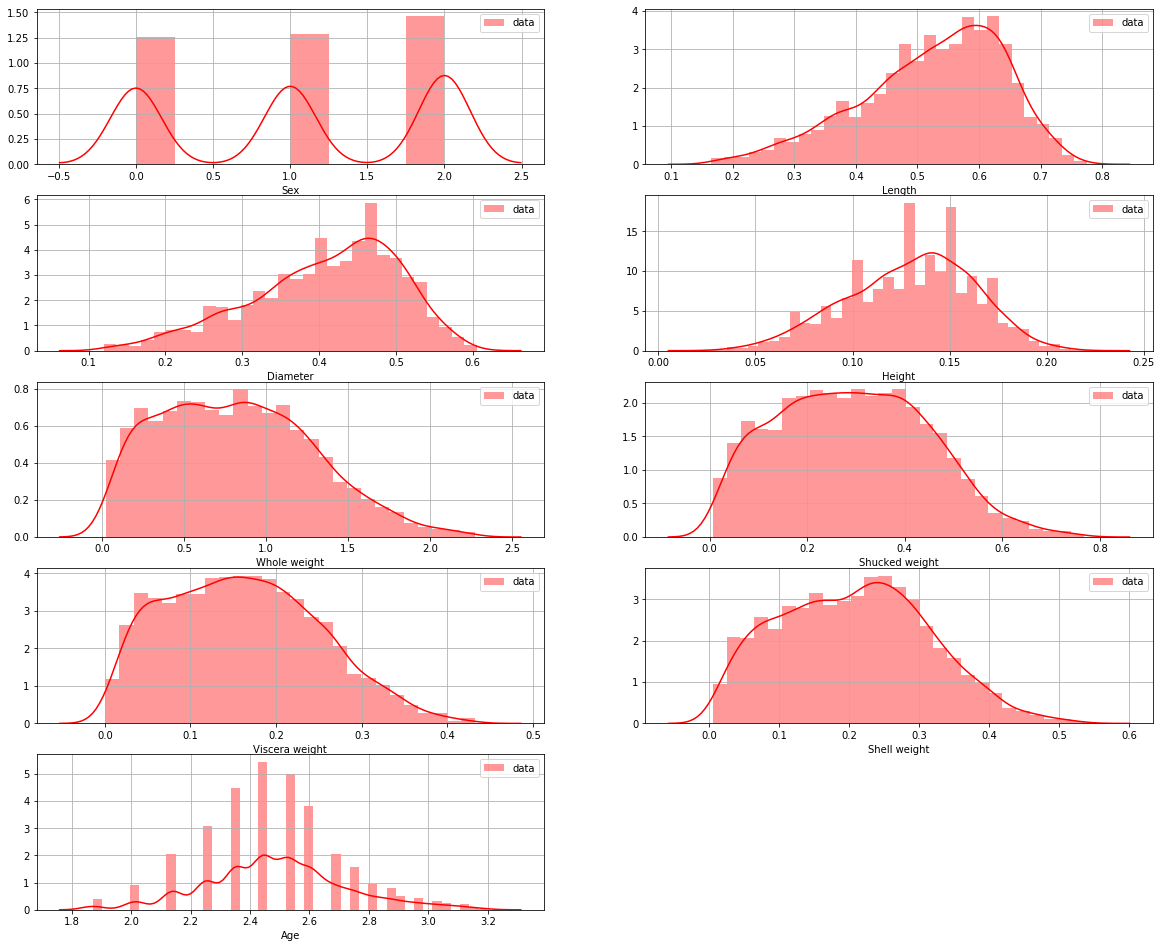

In [24]:
# ........Checking the Distribution again after removing skewness and outliers using the histogram plot......
plt.figure(figsize=(20,20))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(6,2,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

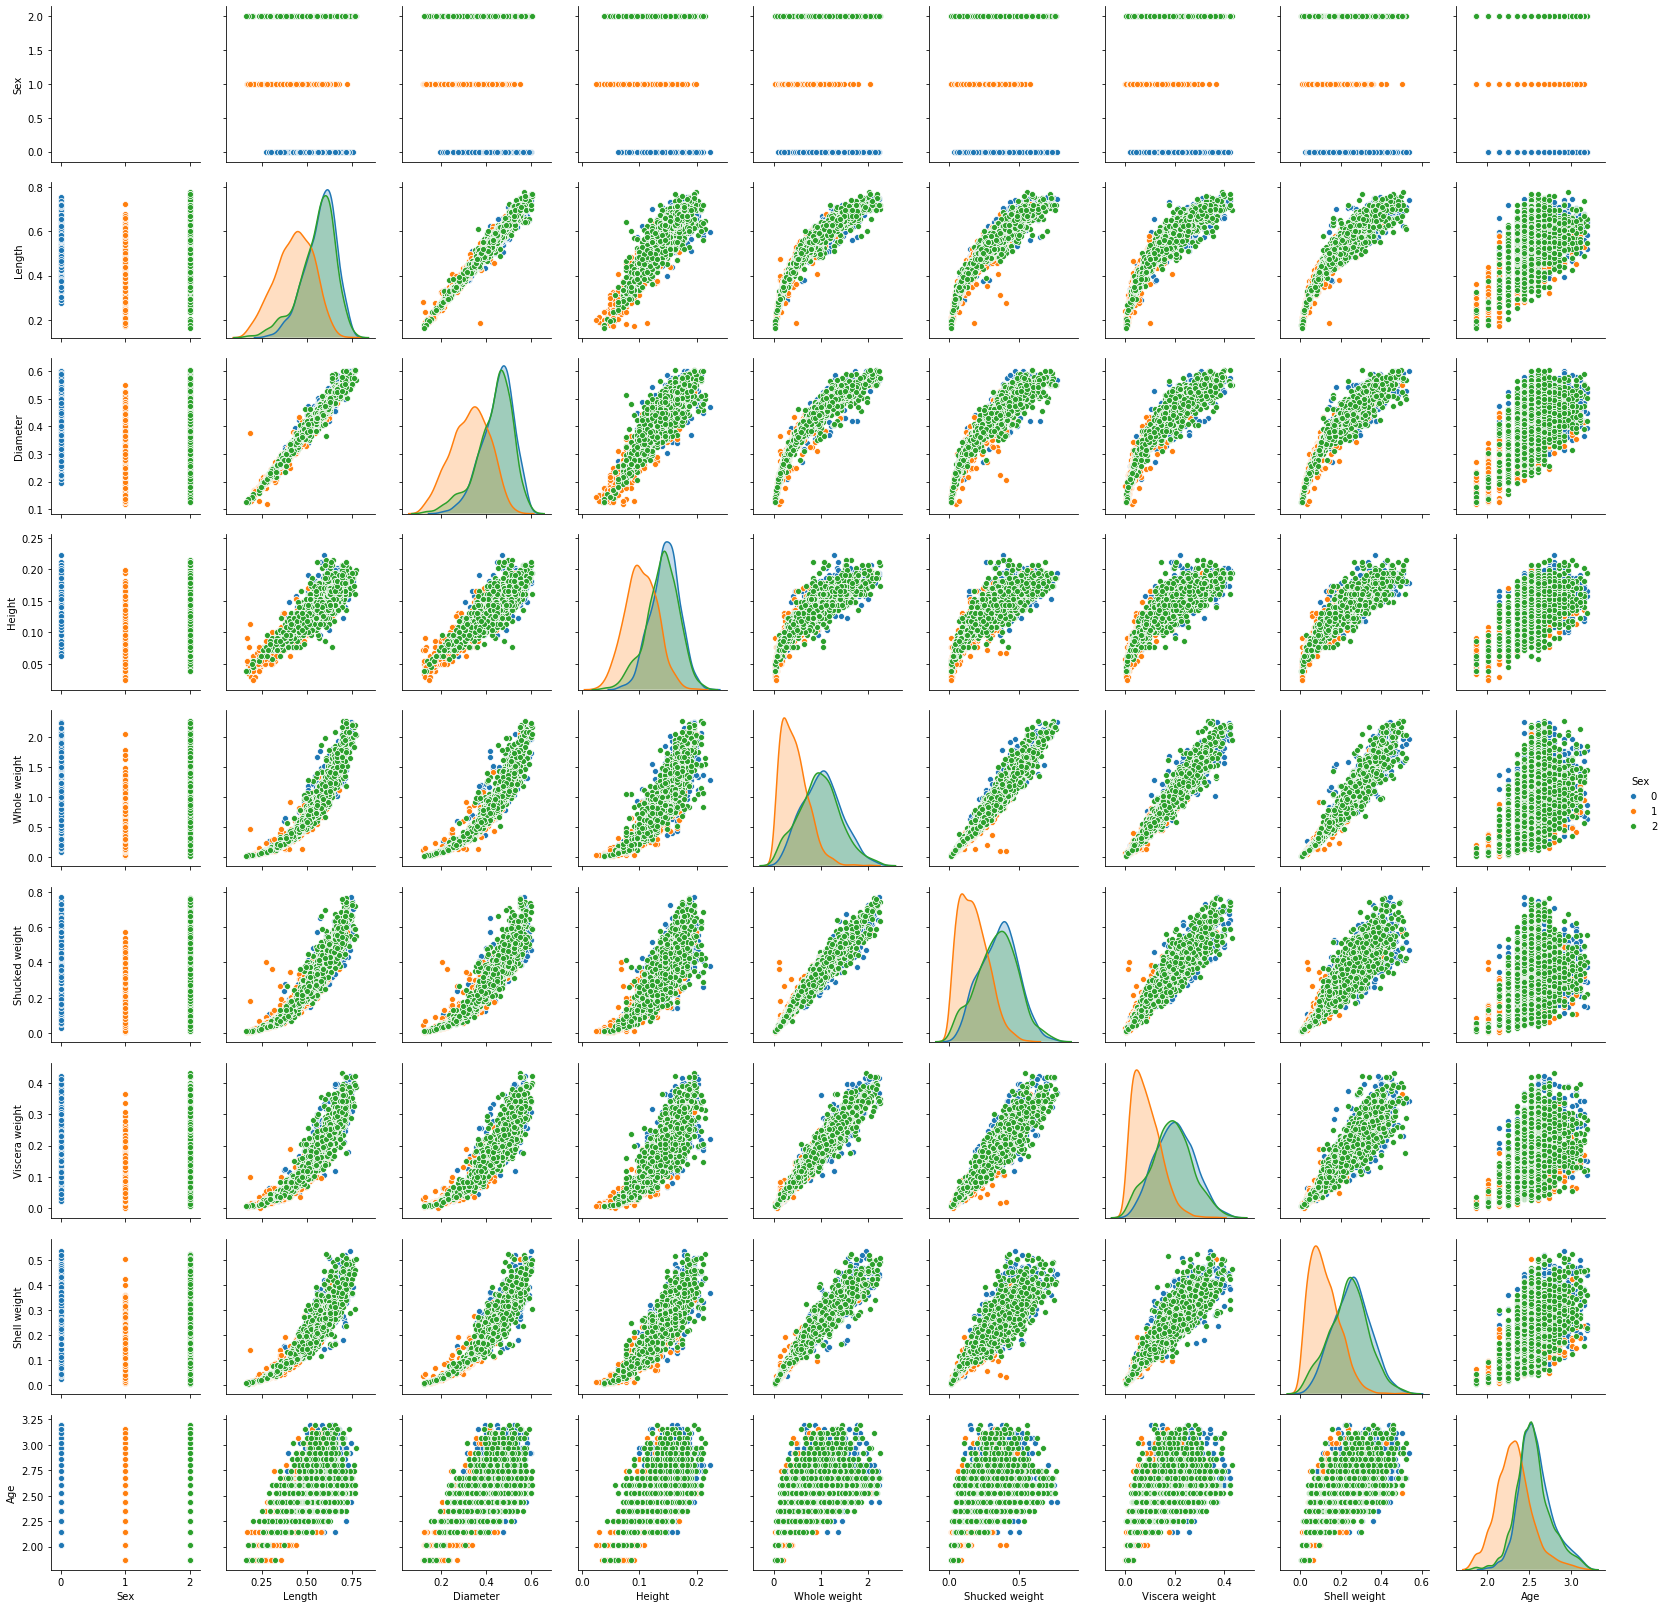

In [45]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df_new,hue='Sex')

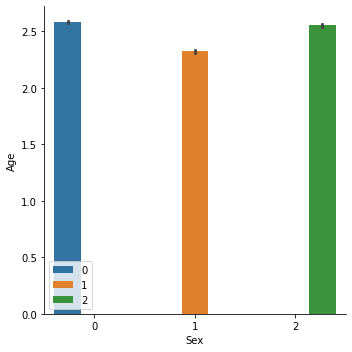

In [26]:
# Visualisation of relatioship between "Age" and "Sex"
sns.catplot(x='Sex',y='Age',data=df_new,hue='Sex',kind='bar')
plt.legend()
plt.show()

# Male =2, Female= 0, Infant=1

In [27]:
# ..........Checking the correlation..........
corr=df_new.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)

# Except "sex" every feature have strong relationship with the Target Feature.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1,-0.04,-0.042,-0.044,-0.029,-0.014,-0.04,-0.038,-0.029
Length,-0.04,1,0.99,0.9,0.93,0.93,0.92,0.93,0.62
Diameter,-0.042,0.99,1,0.91,0.93,0.93,0.92,0.93,0.63
Height,-0.044,0.9,0.91,1,0.89,0.86,0.88,0.91,0.66
Whole weight,-0.029,0.93,0.93,0.89,1,0.97,0.97,0.96,0.58
Shucked weight,-0.014,0.93,0.93,0.86,0.97,1,0.94,0.9,0.5
Viscera weight,-0.04,0.92,0.92,0.88,0.97,0.94,1,0.92,0.57
Shell weight,-0.038,0.93,0.93,0.91,0.96,0.9,0.92,1,0.67
Age,-0.029,0.62,0.63,0.66,0.58,0.5,0.57,0.67,1


(9.0, 0.0)

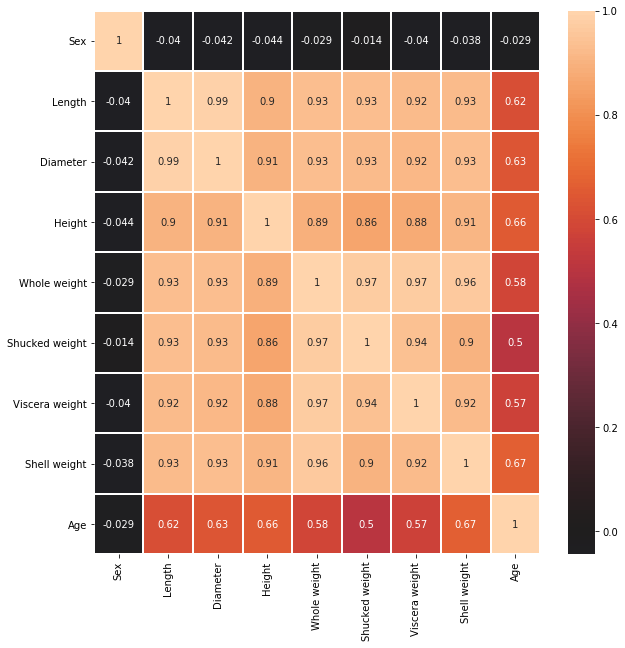

In [28]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,linewidths=1,center=0.0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [29]:
# dropping the Target value in x1 and later this value is passed in standard scaler for further model training.
x1=df_new.drop(['Age'],axis=1)
x1
print(x1.shape)

(4094, 8)


In [30]:
# Setting up the Target value in variable y.
y=df_new['Age']
y.shape

(4094,)

In [31]:
#scaling the input variable for further evaluation......
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.153388,-0.600533,-0.450787,-1.198491,-0.652901,-0.586197,-0.730400,-0.629484
1,1.153388,-1.509147,-1.496290,-1.338837,-1.268773,-1.288008,-1.283083,-1.311684
2,-1.279363,0.048478,0.124240,-0.098262,-0.304939,-0.418056,-0.321764,-0.148290
3,1.153388,-0.730335,-0.450787,-0.369641,-0.648632,-0.634279,-0.597617,-0.588436
4,-0.062988,-1.682216,-1.600840,-1.621472,-1.312535,-1.347558,-1.380600,-1.445259
...,...,...,...,...,...,...,...,...
4089,-1.279363,0.351349,0.437891,0.701755,0.143356,0.145603,0.605380,0.151854
4090,1.153388,0.567686,0.333340,-0.098262,0.312000,0.465869,0.379456,0.238570
4091,1.153388,0.654220,0.699266,1.736979,0.760295,0.846334,1.039733,0.588556
4092,-1.279363,0.870557,0.803817,0.304355,0.586314,0.869791,0.804475,0.501353


#  Model Training

In [32]:
# ............Function for GridSearchcv to find best parameters for every Model.............
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5)
    clf.fit(x,y)
    print(clf.best_params_)
    

In [33]:
#...........Grid Search for SVR..................
SV=SVR()
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters={'C': Cs, 'gamma' : gammas}
grid_cv(SV,parameters,'r2')

{'C': 1, 'gamma': 0.1}


In [34]:
#...............Grid Search for KNeighborsRegressor................
knr=KNeighborsRegressor()
parameters={"n_neighbors":np.arange(1,30)}
grid_cv(knr,parameters,'r2')

{'n_neighbors': 11}


In [35]:
#................Grid Search for Lasso................
ls=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
grid_cv(ls,parameters,'r2')

{'alpha': 0.001}


In [36]:
#..............Grid Search for GradientBoostingRegressor...............
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters,'r2')

{'learning_rate': 0.1, 'n_estimators': 100}


In [37]:
#.................Grid Search for RandomForestRegressor..........
rf=RandomForestRegressor()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'r2')

{'max_features': 'log2', 'n_estimators': 500}


In [38]:
#.......Gridsearchcv for Ada Boost Regressor...........
ada=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(ada,parameters,'r2')

{'learning_rate': 0.001, 'n_estimators': 1000}


In [39]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor(n_neighbors=15)
SV=SVR(C=10,gamma=0.1)
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor(max_features='log2',n_estimators=700)
GBR=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
ABR=AdaBoostRegressor(learning_rate=0.01,n_estimators=100)
LS=Lasso(alpha=0.001)
RD=Ridge()
EN=ElasticNet()

In [40]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))

In [43]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [56]:
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squarred Error : ',mse )
    MSE.append(mse*100)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squarred Error : ',rmse )
    RMSE.append(rmse*100)
    print('\n')
    
    
        


*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')


max r2 score corresponding to 67 is: 0.6245550839306757
Learning Score :  0.6196195338495895
R2 Score :  0.6245550839306757


Cross Val Score :  0.5130959896237766


Mean Squarred Error :  0.021172230475624935


Root Mean Squarred Error :  0.14550680559899917


*************************** SVR *****************************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 67 is: 0.6628658094287128
Learning Score :  0.6500133353847038
R2 Score :  0.6628658094287128


Cross Val Score :  0.5623948981782958


Mean Squarred Error :  0.01901179767918491


Root Mean Squarred Error :  0.13788327556010885




In [58]:
#............. DataFrame to show all the calculated scores at one place........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})  
result

,Model,Learning Score,R2_score,Cross_Val_Score,Mean_squared_error,Root_Mean_squared_error
0,KNeighborsRegressor,61.961953,62.455508,51.309599,2.117223,14.550681
1,SVR,65.001334,66.286581,56.239490,1.901180,13.788328
2,LinearRegression,55.246110,59.325467,47.757340,2.293734,15.145077
3,DecisionTreeRegressor,100.000000,28.308722,9.065631,4.042841,20.106818
4,RandomForestRegressor,94.448016,64.675414,53.869374,1.992037,14.113955
5,GradientBoostingRegressor,67.193555,64.200952,54.085003,2.018793,14.208425
6,AdaBoostRegressor,51.453562,54.408307,39.768756,2.571024,16.034413
7,Lasso,55.020915,58.604934,47.471294,2.334366,15.278632
8,Ridge,55.245563,59.306173,47.764343,2.294822,15.148668
9,ElasticNet,0.000000,-0.001085,-15.485750,5.639299,23.747208


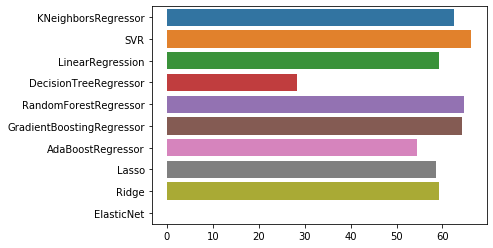

In [59]:
# ..........visualisation of Accuracy Score using Bar Plot..........
sns.barplot(y=Model,x=R2_score)

### After all this process conclusion is that SVR is performing better than rest.

In [60]:
# Using SVR for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=67,test_size=.20,stratify=y)
svr=SVR(C=10,gamma=0.1)
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
svrpred=svr.predict(x_test)
print('R2 Score : ',r2_score(y_test,svrpred))
print('Mean Squarred Error : ',mean_squared_error(y_test,svrpred))
print('Root Mean Squarred Error : ',np.sqrt(mean_squared_error(y_test,svrpred)))

R2 Score :  0.6628658094287128
Mean Squarred Error :  0.01901179767918491
Root Mean Squarred Error :  0.13788327556010885


In [61]:
# Printing predicted values
test=pd.DataFrame(data=y_test)
test['Predicted values']=svrpred
test
# On the lest side values are those which are taken by machine for test...
# we can see here the Predicted and Actual value have very less diff i.e of 0.1 to 0.3 only.....

,Age,Predicted values
1291,2.740840,2.439379
312,3.068053,2.793785
2686,2.602690,2.573573
794,2.674149,2.846641
3134,2.351375,2.538331
...,...,...
3466,2.442347,2.554696
3167,2.862201,2.528250
1275,2.442347,2.417406
3981,2.351375,2.523831


In [62]:
# .........Saving the Predicted values in csv file........
test.to_csv('Project_2_Abalone.csv') 

In [63]:
# ........dumping file.......
from sklearn.externals import joblib
joblib.dump(svr,'Project_2_Abalone.pkl')

['Project_2_Abalone.pkl']

In [64]:
# loading joblib file to see predicted values......
final=joblib.load('Project_2_Abalone.pkl')
final.predict(x_test)

array([2.43937917, 2.79378454, 2.57357282, 2.8466407 , 2.53833132,
       2.23493519, 2.36427508, 2.46651129, 2.38156837, 2.34821477,
       2.52808038, 2.5340465 , 2.75034876, 2.60521928, 2.58423527,
       2.66782434, 2.52707413, 2.7679665 , 2.22519367, 2.47776038,
       2.0610089 , 2.42272929, 2.53830891, 1.99315934, 2.3518383 ,
       2.5486511 , 2.62385417, 2.50569185, 2.83659097, 2.52556387,
       2.30322025, 2.43166816, 2.41140625, 2.51929525, 2.51087602,
       2.64957351, 2.4296187 , 2.27900637, 2.73055935, 2.53249521,
       2.13905374, 2.53532824, 2.58855104, 2.55093867, 2.56272195,
       2.51823368, 2.53261148, 2.36902208, 2.57309934, 2.17031248,
       2.63728349, 2.45025407, 2.28560072, 2.78984202, 2.27658336,
       2.70055494, 2.40559029, 2.34495895, 2.29127725, 2.65020211,
       2.55942265, 2.39144825, 2.30575534, 2.57631938, 2.49733865,
       2.68520289, 2.51259848, 2.57948915, 2.62738748, 2.65956568,
       2.52279282, 2.52779725, 2.42309791, 2.62544597, 2.53833

## Conclusion:

=> By observing the correlation between the target attribute Age and the indepent variables, i inferred that it is possible to      build a model to predict the target value in function of the independent attributes.                     
=> The weight of the Abalone is directly proportional to their sizes.                                      
=> There’s not much differences in size, weight and numbers of rings between male/female abalones.           
=> The Infant Abalones groups presents lower mean values of size, weight and number of rings.         